In [1]:
import pandas as pd
import geopandas
import numpy as np

import matplotlib.pyplot as plt
import rtree
import pygeos

In [2]:
df = pd.read_csv("CN_Flanders_open_dataset.csv")
df

code           campaign   no2       lat       lon
0        1387656             facade  23.0  50.82594  4.704003
1         192852             facade  47.3  51.21328  4.444702
2         192873             facade  21.2  51.30897  4.188672
3         192876             facade  26.6  51.09620  3.991424
4         192879             facade  25.6  51.19922  4.461859
...          ...                ...   ...       ...       ...
17881  STAT_R811  reference station  18.7  51.25159  4.491521
17882  STAT_R817  reference station  24.8  51.17741  4.417936
17883  STAT_R831  reference station  23.8  51.34881  4.339557
17884  STAT_R833  reference station  22.0  51.32855  4.363960
17885  STAT_SZ02  reference station  19.0  50.91298  4.512118

[17886 rows x 5 columns]

In [3]:
len(df)

17886

In [4]:
df["campaign"].value_counts()

facade               17842
background              23
reference station       21
Name: campaign, dtype: int64

In [5]:
df["no2"].mean()

22.782818964553282

In [6]:
df["no2"].describe()

count    17886.000000
mean        22.782819
std          6.422454
min         10.900000
25%         18.300000
50%         21.100000
75%         25.500000
max         75.300000
Name: no2, dtype: float64

<AxesSubplot:>

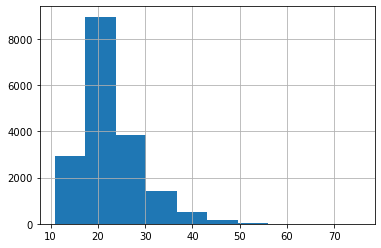

In [7]:
df['no2'].hist()  # plot.hist()

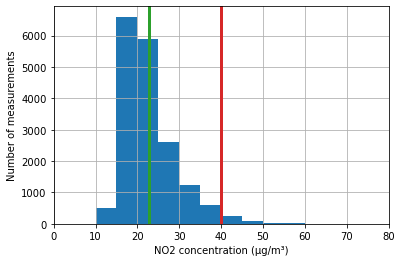

In [8]:
fig, ax = plt.subplots()
# using predefined bins
df['no2'].hist(ax=ax, bins=np.arange(0, 80, 5))
# adding x/y axis labels, and setting the range for the x axis
ax.set(xlabel="NO2 concentration (µg/m³)",
       ylabel="Number of measurements", xlim=(0,80))
# adding a line with the mean
ax.axvline(x=df['no2'].mean(), color='C2', linewidth=3)
# adding a line with the EU yearly limit value of 40 µg/m³
ax.axvline(x=40, color='C3', linewidth=3)

In [9]:
exceedances = df['no2'] > 40

In [10]:
exceedances.mean() * 100  # the mean is equivalent here to counting the True values and dividing by the total number of elements

2.264340825226434

In [11]:
df[df['campaign'] == "background"]["no2"].mean()

14.756521739130434

In [12]:
df.groupby('campaign')["no2"].mean()

campaign
background           14.756522
facade               22.789710
reference station    25.719048
Name: no2, dtype: float64

In [13]:
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df['lon'], df['lat']), crs="EPSG:4326")

In [14]:
gdf

code           campaign   no2       lat       lon  \
0        1387656             facade  23.0  50.82594  4.704003   
1         192852             facade  47.3  51.21328  4.444702   
2         192873             facade  21.2  51.30897  4.188672   
3         192876             facade  26.6  51.09620  3.991424   
4         192879             facade  25.6  51.19922  4.461859   
...          ...                ...   ...       ...       ...   
17881  STAT_R811  reference station  18.7  51.25159  4.491521   
17882  STAT_R817  reference station  24.8  51.17741  4.417936   
17883  STAT_R831  reference station  23.8  51.34881  4.339557   
17884  STAT_R833  reference station  22.0  51.32855  4.363960   
17885  STAT_SZ02  reference station  19.0  50.91298  4.512118   

                       geometry  
0      POINT (4.70400 50.82594)  
1      POINT (4.44470 51.21328)  
2      POINT (4.18867 51.30897)  
3      POINT (3.99142 51.09620)  
4      POINT (4.46186 51.19922)  
...                         ...  
17881  POINT (4.49152 51.25159)  
17882  POINT (4.41794 51.17741)  
17883  POINT (4.33956 51.34881)  
17884  POINT (4.36396 51.32855)  
17885  POINT (4.51212 50.91298)  

[17886 rows x 6 columns]

<AxesSubplot:>

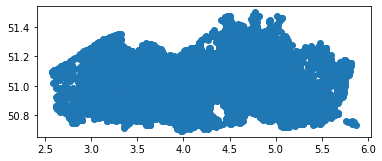

In [15]:
gdf.plot()

<AxesSubplot:>

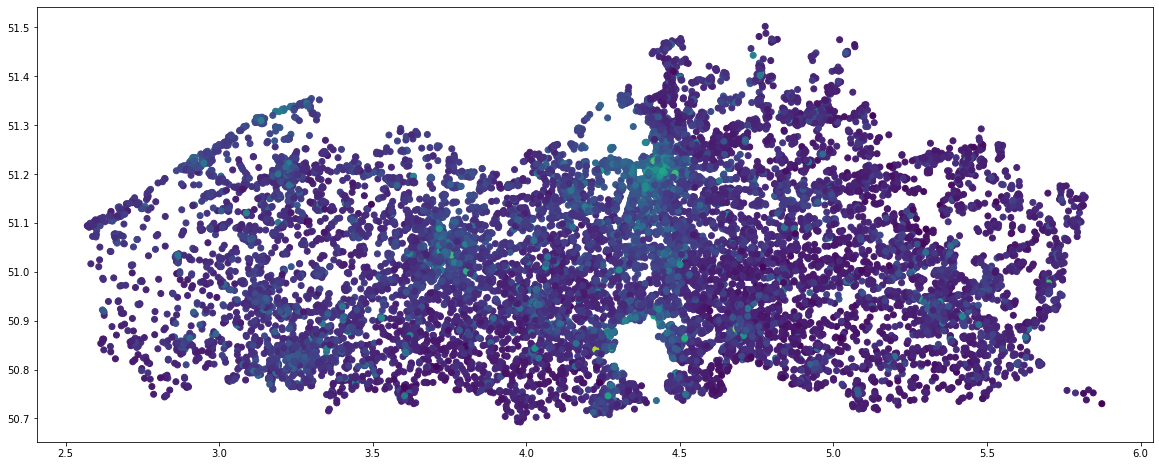

In [16]:
gdf.plot(column="no2", figsize=(20, 10))

In [17]:
muni = geopandas.read_file("Refgem.shp")

In [18]:
muni.head()

OIDN   UIDN   VERSDATUM  TERRID   DATPUBLBS       NUMAC NISCODE  \
0  278.0  278.0  1900-01-01       1  1976-01-23  1975123003   13001   
1  209.0  209.0  1900-01-01       2  1982-12-29  1982001920   13031   
2   67.0   67.0  1900-01-01       3  1831-02-07        None   13025   
3   53.0   53.0  1900-01-01       4  1976-01-23  1975123003   72037   
4  102.0  102.0  1900-01-01       5  1982-12-29  1982001920   13036   

           NAAM        LENGTE       OPPERVL  \
0      Arendonk  32278.608018  5.501111e+07   
1  Oud-Turnhout  33317.260657  3.917257e+07   
2           Mol  77705.294504  1.144999e+08   
3  Hamont-Achel  31929.641885  4.373537e+07   
4         Retie  35339.133575  4.865207e+07   

                                            geometry  
0  POLYGON ((198892.290 231761.690, 202087.220 22...  
1  POLYGON ((191910.672 228249.047, 192000.239 22...  
2  POLYGON ((203378.850 223128.860, 205356.450 22...  
3  POLYGON ((230005.370 221212.320, 230240.580 22...  
4  POLYGON ((200827.109 220823.391, 201389.922 22...

<AxesSubplot:>

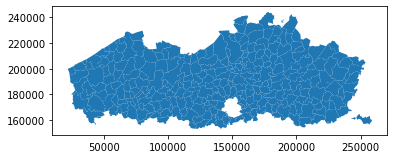

In [19]:
muni.plot()

In [20]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
muni.crs

<Projected CRS: EPSG:31370>
Name: Belge 1972 / Belgian Lambert 72
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Belgium - onshore.
- bounds: (2.5, 49.5, 6.4, 51.51)
Coordinate Operation:
- name: Belgian Lambert 72
- method: Lambert Conic Conformal (2SP)
Datum: Reseau National Belge 1972
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [22]:
gdf_lambert = gdf.to_crs("EPSG:31370")  # or .to_crs(muni.crs)
gdf_lambert.head()

code campaign   no2       lat       lon                       geometry
0  1387656   facade  23.0  50.82594  4.704003  POINT (173620.682 168443.754)
1   192852   facade  47.3  51.21328  4.444702  POINT (155306.731 211483.310)
2   192873   facade  21.2  51.30897  4.188672  POINT (137441.957 222141.788)
3   192876   facade  26.6  51.09620  3.991424  POINT (123567.247 198522.091)
4   192879   facade  25.6  51.19922  4.461859  POINT (156507.579 209920.455)

In [23]:
gdf_combined = geopandas.sjoin(gdf_lambert, muni[["NAAM", "geometry"]])

In [24]:
gdf_combined.head()

code campaign   no2        lat       lon  \
0     1387656   facade  23.0  50.825940  4.704003   
79     194382   facade  21.2  50.832260  4.726776   
544    199500   facade  19.3  50.838730  4.663526   
1047   204192   facade  13.7  50.810110  4.649417   
1207   205932   facade  18.5  50.830579  4.731757   

                           geometry  index_right          NAAM  
0     POINT (173620.682 168443.754)          258  Oud-Heverlee  
79    POINT (175221.784 169154.289)          258  Oud-Heverlee  
544   POINT (170763.161 169854.380)          258  Oud-Heverlee  
1047  POINT (169781.426 166666.852)          258  Oud-Heverlee  
1207  POINT (175573.590 168968.961)          258  Oud-Heverlee

In [25]:
muni_mean = gdf_combined.groupby("NAAM")["no2"].mean()
muni_mean.head()

NAAM
Aalst         25.170196
Aalter        20.734951
Aarschot      19.738710
Aartselaar    28.256604
Affligem      24.745455
Name: no2, dtype: float64

In [26]:
muni_mean = muni_mean.reset_index()
muni_mean.head()

NAAM        no2
0       Aalst  25.170196
1      Aalter  20.734951
2    Aarschot  19.738710
3  Aartselaar  28.256604
4    Affligem  24.745455

In [27]:
muni_no2 = pd.merge(muni, muni_mean, on="NAAM")
muni_no2.head()

OIDN   UIDN   VERSDATUM  TERRID   DATPUBLBS       NUMAC NISCODE  \
0  278.0  278.0  1900-01-01       1  1976-01-23  1975123003   13001   
1  209.0  209.0  1900-01-01       2  1982-12-29  1982001920   13031   
2   67.0   67.0  1900-01-01       3  1831-02-07        None   13025   
3   53.0   53.0  1900-01-01       4  1976-01-23  1975123003   72037   
4  102.0  102.0  1900-01-01       5  1982-12-29  1982001920   13036   

           NAAM        LENGTE       OPPERVL  \
0      Arendonk  32278.608018  5.501111e+07   
1  Oud-Turnhout  33317.260657  3.917257e+07   
2           Mol  77705.294504  1.144999e+08   
3  Hamont-Achel  31929.641885  4.373537e+07   
4         Retie  35339.133575  4.865207e+07   

                                            geometry        no2  
0  POLYGON ((198892.290 231761.690, 202087.220 22...  18.921053  
1  POLYGON ((191910.672 228249.047, 192000.239 22...  17.872973  
2  POLYGON ((203378.850 223128.860, 205356.450 22...  19.103061  
3  POLYGON ((230005.370 221212.320, 230240.580 22...  17.855172  
4  POLYGON ((200827.109 220823.391, 201389.922 22...  18.064286

<AxesSubplot:>

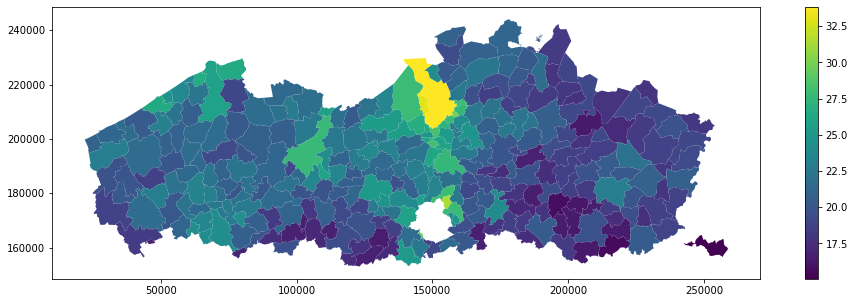

In [28]:
muni_no2.plot(column="no2", figsize=(16, 5), legend=True)

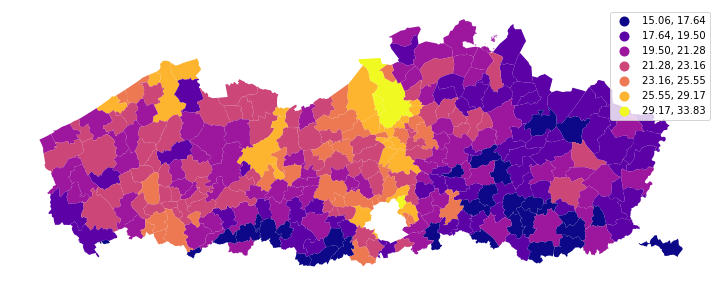

In [29]:
ax = muni_no2.plot(column="no2", figsize=(16, 5), legend=True, scheme="FisherJenks", k=7, cmap="plasma")
ax.set_axis_off()

In [30]:
gdf_combined["exceedance"] = gdf_combined["no2"] > 40

In [31]:
exceedances_muni = gdf_combined.groupby("NAAM")["exceedance"].mean() * 100

In [32]:
exceedances_muni.sort_values(ascending=False).head(10)

NAAM
Antwerpen      17.114428
Vilvoorde       7.894737
Asse            6.493506
Melle           6.122449
Mechelen        6.008584
Berlare         5.882353
Zwijndrecht     5.714286
Dilbeek         5.600000
Gent            5.321782
Kaprijke        5.263158
Name: exceedance, dtype: float64

{'driver': 'GTiff', 'dtype': 'int8', 'nodata': -128.0, 'width': 2530, 'height': 1133, 'count': 1, 'crs': CRS.from_epsg(3035), 'transform': Affine(100.0, 0.0, 3789500.0,
       0.0, -100.0, 3177900.0)}


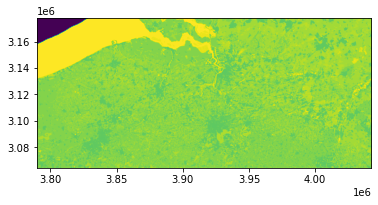

In [33]:
import rasterio
import rasterio.plot

with rasterio.open("CLC2018_V2020_20u1_flanders.tif") as src:
    print(src.meta)
    rasterio.plot.show(src)

In [34]:
import xarray

raster = xarray.open_rasterio("CLC2018_V2020_20u1_flanders.tif")
raster

<xarray.DataArray (band: 1, y: 1133, x: 2530)>
[2866490 values with dtype=int8]
Coordinates:
  * band     (band) int32 1
  * y        (y) float64 3.178e+06 3.178e+06 3.178e+06 ... 3.065e+06 3.065e+06
  * x        (x) float64 3.79e+06 3.79e+06 3.79e+06 ... 4.042e+06 4.042e+06
Attributes:
    transform:      (100.0, 0.0, 3789500.0, 0.0, -100.0, 3177900.0)
    crs:            +init=epsg:3035
    res:            (100.0, 100.0)
    is_tiled:       0
    nodatavals:     (-128.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

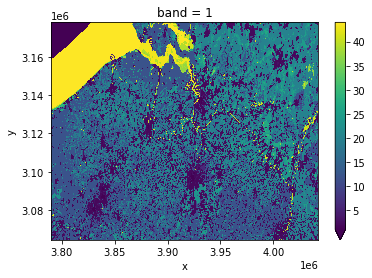

In [35]:
raster.plot(vmin=1, vmax=44)

In [36]:
gdf_raster = gdf.to_crs("EPSG:3035")
gdf_raster.head()

code campaign   no2       lat       lon                         geometry
0  1387656   facade  23.0  50.82594  4.704003  POINT (3948208.320 3092876.582)
1   192852   facade  47.3  51.21328  4.444702  POINT (3933249.515 3137216.482)
2   192873   facade  21.2  51.30897  4.188672  POINT (3916264.675 3149224.100)
3   192876   facade  26.6  51.09620  3.991424  POINT (3900625.411 3126731.909)
4   192879   facade  25.6  51.19922  4.461859  POINT (3934326.401 3135565.137)

In [37]:
import rasterstats

In [38]:
gdf['land_use'] = rasterstats.point_query(gdf_raster.geometry, "CLC2018_V2020_20u1_flanders.tif", interpolate='nearest')

In [39]:
gdf['land_use'].value_counts()

2     14629
20      937
1       604
12      504
21      348
3       277
18      234
11       69
25       61
24       56
23       46
4        44
16       18
5        15
10       15
27        7
40        5
29        4
43        4
41        3
26        2
30        1
9         1
35        1
37        1
Name: land_use, dtype: int64

In [40]:
legend = pd.read_csv("CLC2018_V2018_legend_grouped.csv")
legend

code  value                                              class  \
0    111      1                            Continuous urban fabric   
1    112      2                         Discontinuous urban fabric   
2    121      3                     Industrial or commercial units   
3    122      4         Road and rail networks and associated land   
4    123      5                                         Port areas   
5    124      6                                           Airports   
6    131      7                           Mineral extraction sites   
7    132      8                                         Dump sites   
8    133      9                                 Construction sites   
9    141     10                                  Green urban areas   
10   142     11                       Sport and leisure facilities   
11   211     12                          Non-irrigated arable land   
12   212     13                         Permanently irrigated land   
13   213     14                                        Rice fields   
14   221     15                                          Vineyards   
15   222     16                  Fruit trees and berry plantations   
16   223     17                                       Olive groves   
17   231     18                                           Pastures   
18   241     19       Annual crops associated with permanent crops   
19   242     20                       Complex cultivation patterns   
20   243     21  Land principally occupied by agriculture with ...   
21   244     22                                Agro-forestry areas   
22   311     23                                Broad-leaved forest   
23   312     24                                  Coniferous forest   
24   313     25                                       Mixed forest   
25   321     26                                 Natural grasslands   
26   322     27                                Moors and heathland   
27   323     28                          Sclerophyllous vegetation   
28   324     29                        Transitional woodland-shrub   
29   331     30                                Beaches dunes sands   
30   332     31                                         Bare rocks   
31   333     32                           Sparsely vegetated areas   
32   334     33                                        Burnt areas   
33   335     34                        Glaciers and perpetual snow   
34   411     35                                     Inland marshes   
35   412     36                                          Peat bogs   
36   421     37                                       Salt marshes   
37   422     38                                            Salines   
38   423     39                                   Intertidal flats   
39   511     40                                      Water courses   
40   512     41                                       Water bodies   
41   521     42                                    Coastal lagoons   
42   522     43                                          Estuaries   
43   523     44                                      Sea and ocean   

                                group  
0             Continuous urban fabric  
1          Discontinuous urban fabric  
2      Industrial or commercial units  
3                     Transport units  
4                     Transport units  
5                     Transport units  
6   Mine, dump and construction sites  
7   Mine, dump and construction sites  
8   Mine, dump and construction sites  
9                   Green urban areas  
10                  Green urban areas  
11                Agricultural areas   
12                Agricultural areas   
13                Agricultural areas   
14                Agricultural areas   
15                Agricultural areas   
16                Agricultural areas   
17                Agricultural areas   
18                Agricultural areas   
19                Agricultural areas   
20           

In [41]:
value_to_group = dict(zip(legend['value'], legend['group']))

In [42]:
gdf['land_use_class'] = gdf['land_use'].replace(value_to_group)

In [43]:
gdf['land_use_class'].value_counts()

Discontinuous urban fabric           14629
Agricultural areas                    2041
Continuous urban fabric                604
Industrial or commercial units         277
Forest and seminatural areas           177
Green urban areas                       84
Transport units                         59
Water bodies                            12
Wetlands                                 2
Mine, dump and construction sites        1
Name: land_use_class, dtype: int64

In [44]:
counts = gdf['land_use_class'].value_counts()

In [45]:
frequent_categories = counts[counts > 50].index

In [46]:
subset = gdf[gdf["land_use_class"].isin(frequent_categories)]

In [47]:
subset.groupby("land_use_class")['no2'].mean()

land_use_class
Agricultural areas                19.145811
Continuous urban fabric           34.367715
Discontinuous urban fabric        22.779602
Forest and seminatural areas      17.427684
Green urban areas                 22.376190
Industrial or commercial units    25.736462
Transport units                   32.996610
Name: no2, dtype: float64

In [48]:
import seaborn

<AxesSubplot:xlabel='no2', ylabel='land_use_class'>

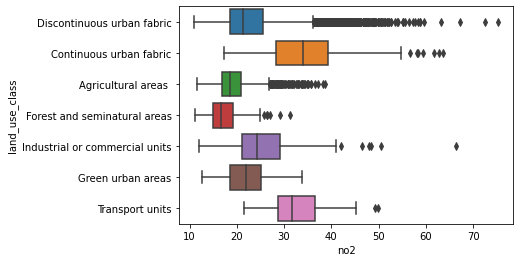

In [49]:
seaborn.boxplot(y="land_use_class", x="no2", data=subset)

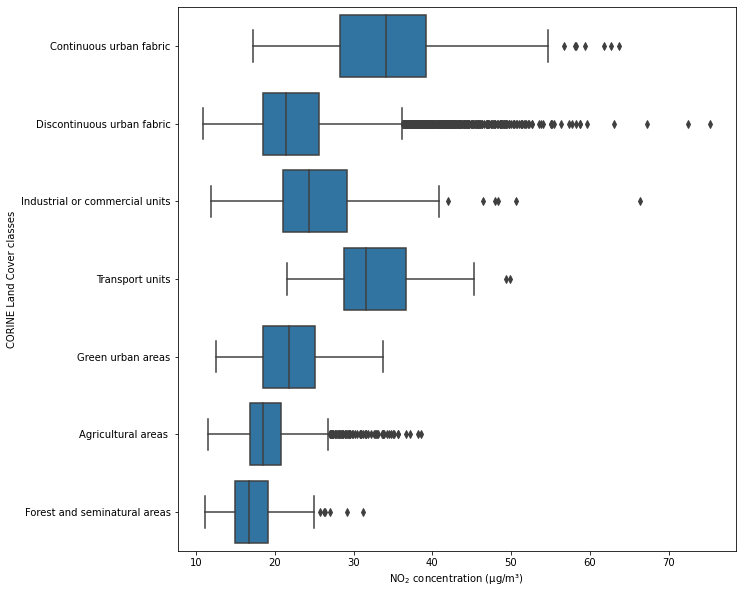

In [50]:
# defining custom order of the classes (following the order in the CORINE hierarchy as defined in the legend csv)
classes = legend["group"].unique()
# but removing the infrequent ones
counts = gdf['land_use_class'].value_counts()
frequent_categories = counts[counts > 50].index
classes = [value for value in classes if value in frequent_categories]

fig, ax = plt.subplots(figsize=(10, 10))
seaborn.boxplot(y="land_use_class", x="no2", data=subset, ax=ax, color="C0", order=classes)
ax.set(xlabel="NO$_2$ concentration (µg/m³)", ylabel="CORINE Land Cover classes");

In [51]:
gent = muni[muni["NAAM"] == "Gent"].geometry.item()

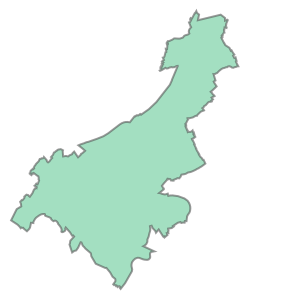

In [52]:
gent

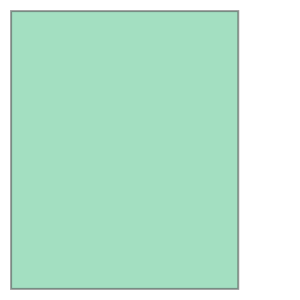

In [53]:
gent_region = gent.envelope
gent_region

In [54]:
gdf_gent = gdf_lambert[gdf_lambert.within(gent_region)]

In [55]:
len(gdf_gent)

1291

In [56]:
gdf_gent = geopandas.clip(gdf_lambert, gent_region)
len(gdf_gent)

1291

In [57]:
import contextily

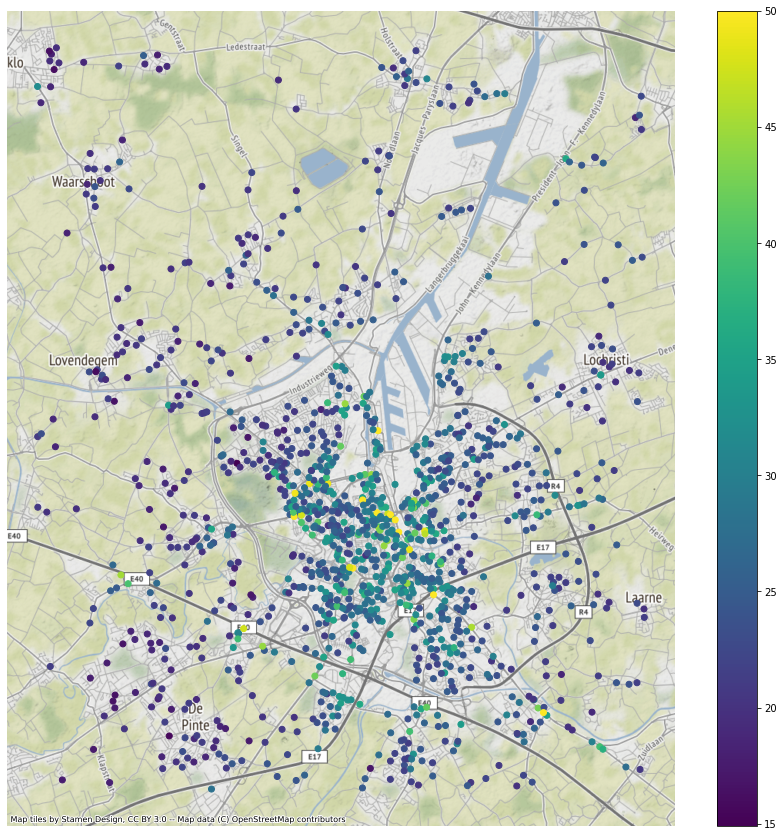

In [58]:
fig, ax = plt.subplots(figsize=(15, 15))
ax = gdf_gent.to_crs(3857).plot(column="no2", ax=ax, legend=True, vmax=50)
contextily.add_basemap(ax)
ax.set_axis_off()

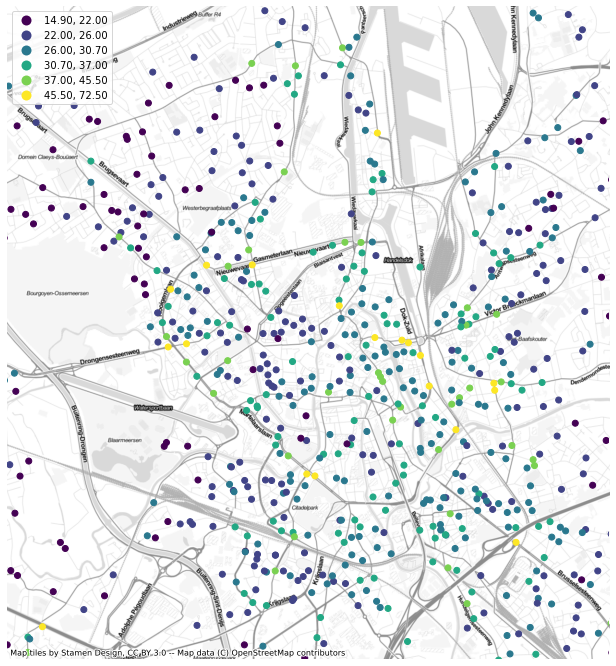

In [59]:
fig, ax = plt.subplots(figsize=(12, 12))
ax = gdf_gent.to_crs(3857).plot(column="no2", ax=ax, scheme="NaturalBreaks", k=6, legend=True)
ax.set(xlim=(408_000, 420_000), ylim=(6_625_000, 6_638_000))
contextily.add_basemap(ax, source=contextily.providers.Stamen.TonerLite)
ax.set_axis_off()

In [60]:
streets = geopandas.read_file("osm_network_gent.gpkg")
streets.head()

highway                  name osm_type  \
0      primary   Oudenaardsesteenweg      way   
1      primary            Krijgslaan      way   
2  residential  Paul Fredericqstraat      way   
3  residential           Meersstraat      way   
4  residential  Jakob Heremansstraat      way   

                                            geometry  
0  LINESTRING (3.70951 51.01845, 3.70951 51.01863...  
1    LINESTRING (3.71157 51.02641, 3.71165 51.02642)  
2  LINESTRING (3.71340 51.04028, 3.71338 51.04032...  
3    LINESTRING (3.71036 51.03886, 3.71041 51.03888)  
4  LINESTRING (3.71154 51.04173, 3.71149 51.04166...

In [61]:
streets = streets.to_crs("EPSG:31370")

<AxesSubplot:>

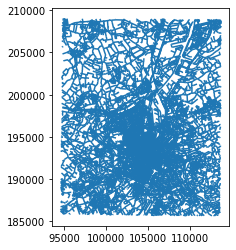

In [62]:
streets.plot()

<AxesSubplot:>

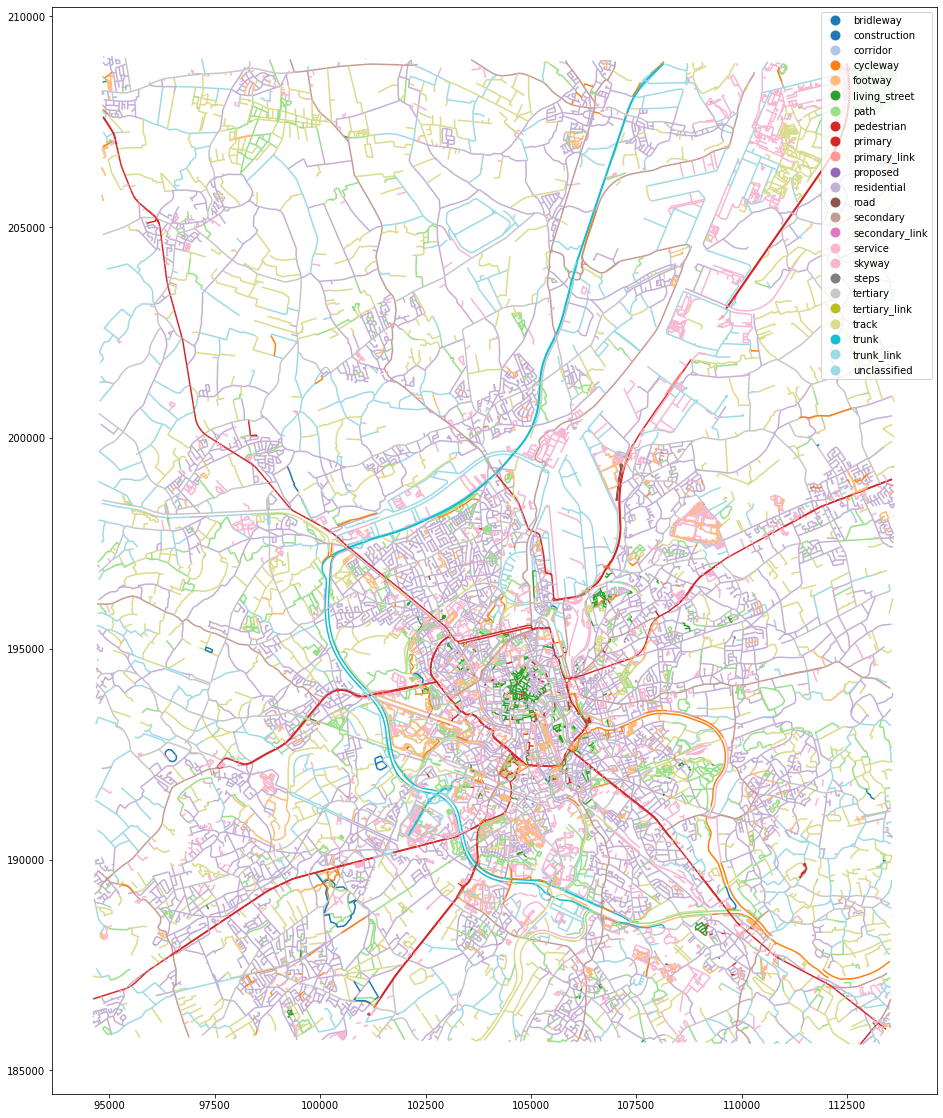

In [63]:
streets.plot(column="highway", figsize=(20, 20), legend=True, cmap="tab20")

In [64]:
point = gdf_gent["geometry"].iloc[0]

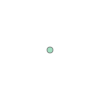

In [65]:
point

In [66]:
streets.distance(point)

0        3349.764329
1        3251.415162
2        3402.321280
3        3251.134400
4        3376.045275
            ...     
27198    5040.480298
27199    5004.142959
27200    8586.521302
27201    8419.522505
27202    8426.405269
Length: 27203, dtype: float64

In [67]:
streets.distance(point).min()

0.1806720424226757

In [68]:
idx_closest = streets.distance(point).idxmin()
idx_closest

5831

In [69]:
streets.loc[idx_closest]

highway                                           residential
name                                   Kleine Goedingenstraat
osm_type                                                  way
geometry    LINESTRING (100713.3610374056 191402.832712162...
Name: 5831, dtype: object

In [70]:
streets["highway"][idx_closest]

'residential'

In [71]:
streets.loc[idx_closest, "highway"]

'residential'

In [72]:
def closest_road_type(point, streets):
    """Type to the nearest road (OpenStreetMap)"""
    dist = streets.distance(point)
    idx_closest = dist.idxmin()
    return streets.loc[idx_closest, "highway"]

In [73]:
closest_road_type(point, streets)

'residential'

In [74]:
streets_unioned = streets.dissolve("highway").reset_index()

In [75]:
gdf_gent["road_type"] = gdf_gent.geometry.apply(lambda point: closest_road_type(point, streets_unioned))

In [76]:
gdf_gent.head()

code campaign   no2       lat       lon                       geometry  \
22  193077   facade  19.1  51.03088  3.665770  POINT (100686.416 191421.422)   
35  193479   facade  28.6  51.05893  3.700956  POINT (103182.640 194519.028)   
46  193677   facade  43.1  51.02716  3.747452  POINT (106412.712 190956.554)   
53  193797   facade  31.6  51.01916  3.763333  POINT (107519.565 190057.417)   
54  193836   facade  30.1  51.07007  3.703455  POINT (103368.925 195756.713)   

      road_type  
22  residential  
35  residential  
46    secondary  
53  residential  
54     tertiary

In [77]:
gdf_gent["road_type"].value_counts()

residential      886
tertiary         208
secondary         61
primary           50
unclassified      39
living_street     22
service            7
track              5
path               4
cycleway           3
pedestrian         3
footway            3
Name: road_type, dtype: int64

In [78]:
mapping = {
    "footway": "pedestrian",
    "living_street": "pedestrian",
    "path": "pedestrian",
}

In [79]:
gdf_gent["road_type"] = gdf_gent["road_type"].replace(mapping)

In [80]:
categories = ["primary", "secondary", "tertiary", "residential", "pedestrian"]

In [81]:
subset = gdf_gent[gdf_gent["road_type"].isin(categories)]

In [82]:
subset.groupby("road_type").size()  # subset["road_type"].value_counts()

road_type
pedestrian      32
primary         50
residential    886
secondary       61
tertiary       208
dtype: int64

In [83]:
subset.groupby("road_type")['no2'].mean()

road_type
pedestrian     24.850000
primary        37.318000
residential    24.719413
secondary      30.209836
tertiary       28.471154
Name: no2, dtype: float64

<AxesSubplot:xlabel='road_type', ylabel='no2'>

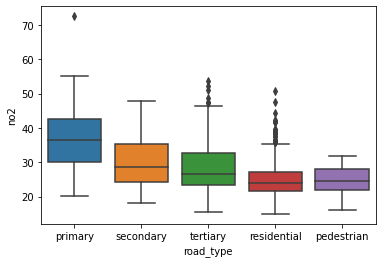

In [84]:
seaborn.boxplot(x="road_type", y="no2", data=subset, order=categories)